In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from tabulate import tabulate

In [2]:
df = pd.read_csv('rainfall.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


# Data Preprocessing - handling missing values, dropping irrelevant columns, scaling, etc.

In [3]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['day'], axis=1, inplace=True)

In [4]:
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   maxtemp        2190 non-null   float64
 2   temparature    2190 non-null   float64
 3   mintemp        2190 non-null   float64
 4   dewpoint       2190 non-null   float64
 5   humidity       2190 non-null   float64
 6   cloud          2190 non-null   float64
 7   sunshine       2190 non-null   float64
 8   winddirection  2190 non-null   float64
 9   windspeed      2190 non-null   float64
 10  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 188.3 KB


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


# scaling

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df != 'rainfall')

In [9]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


# Data Visualization

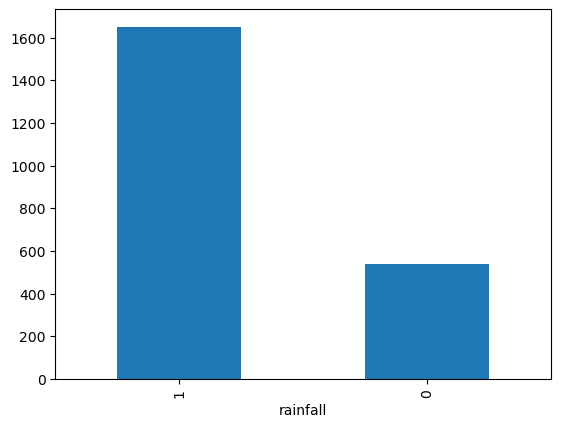

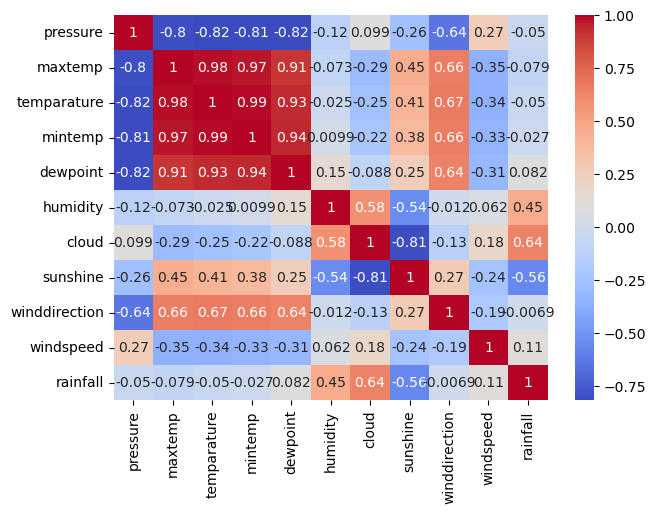

In [10]:
# show rainfall value counts with bar plot
df['rainfall'].value_counts().plot(kind='bar')
plt.show()
# show correlation matrix with heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Model Selection

In [11]:
x = df.drop(columns=['rainfall'])
y = df['rainfall']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
x_train.shape, y_train.shape

((1752, 10), (1752,))

In [13]:
x_val.shape, y_val.shape

((219, 10), (219,))

# Decision Tree Classifier

In [14]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [15]:
y_pred = dt.predict(x_val)
c_dt = classification_report(y_val, y_pred, output_dict=True)
print(classification_report(y_val, y_pred))
ac_dt = accuracy_score(y_val, y_pred)
print('accuracy score: ', accuracy_score(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.51      0.54        63
           1       0.81      0.85      0.83       156

    accuracy                           0.75       219
   macro avg       0.69      0.68      0.68       219
weighted avg       0.74      0.75      0.74       219

accuracy score:  0.7488584474885844


# Random Forest Classifier

In [16]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(x_val)
cr_rf = classification_report(y_val, y_pred, output_dict=True)
print(classification_report(y_val, y_pred))
ac_rf = accuracy_score(y_val, y_pred)
print('accuracy score: ', accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66        63
           1       0.85      0.92      0.88       156

    accuracy                           0.83       219
   macro avg       0.80      0.76      0.77       219
weighted avg       0.82      0.83      0.82       219

accuracy score:  0.8264840182648402


In [18]:

data = [
  ["Decision Tree Classifier", ac_dt, c_dt['0']['precision'], c_dt['0']['recall'], c_dt['0']['f1-score']],
  ["Random Forest Classifier", ac_rf, cr_rf['0']['precision'], cr_rf['0']['recall'], cr_rf['0']['f1-score']
],]


headers = ['Model', 'accuracy score', 'Precision', 'Recall', 'F1-Score']
table = tabulate(data, headers=headers, tablefmt='grid')
print(table)

+--------------------------+------------------+-------------+----------+------------+
| Model                    |   accuracy score |   Precision |   Recall |   F1-Score |
+==========================+==================+=============+==========+============+
| Decision Tree Classifier |         0.748858 |    0.571429 | 0.507937 |   0.537815 |
+--------------------------+------------------+-------------+----------+------------+
| Random Forest Classifier |         0.826484 |    0.755102 | 0.587302 |   0.660714 |
+--------------------------+------------------+-------------+----------+------------+


# Hyperparameter Tuning

In [19]:
param_grid={
    'max_depth':[3,5,7,None],
    'min_samples_split':[2,5,8],
    'min_samples_leaf':[1,3,5],
    'max_features':['auto','sqrt','log','None']

}

In [22]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log', 'None'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy')

In [24]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [23]:
best_model = grid_search.best_estimator_

In [25]:
y_pred = best_model.predict(x_val)
ac_after = accuracy_score(y_val, y_pred)
print('accuracy score: ', ac_after)

accuracy score:  0.817351598173516


In [ ]:
data = [
  ["Decision Tree Classifier", ac_dt],
  ["After hyperparameter", ac_after]
]


headers = ['Method', 'accuracy score']
table = tabulate(data, headers=headers, tablefmt='grid')
print(table)

+--------------------------+------------------+
| Method                   |   accuracy score |
+==========================+==================+
| Decision Tree Classifier |         0.748858 |
+--------------------------+------------------+
| After hyperparameter     |         0.817352 |
+--------------------------+------------------+


: 